#Q1:Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
#import dataset
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [39]:
data=pd.read_csv("crime_data.csv")

In [5]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [40]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [9]:
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
data.shape

(50, 4)

Exploratory Data Analysis

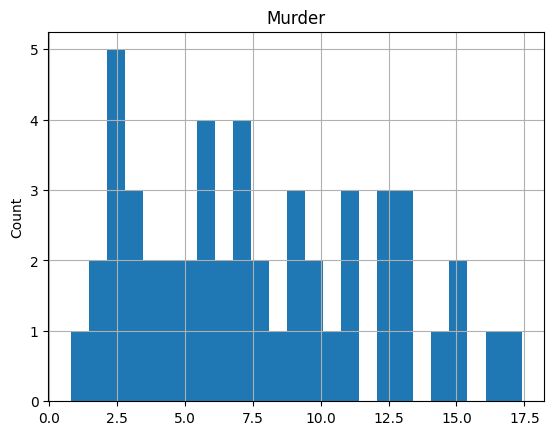

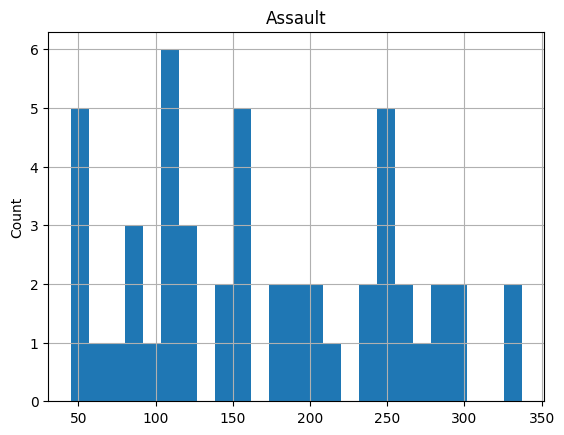

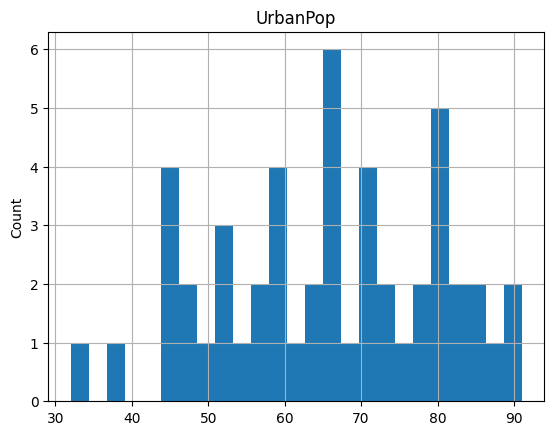

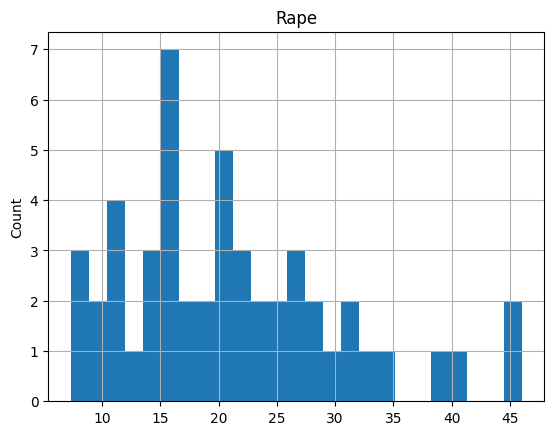

In [11]:
for feature in data.columns:
    data =data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [12]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Outlier Dectection

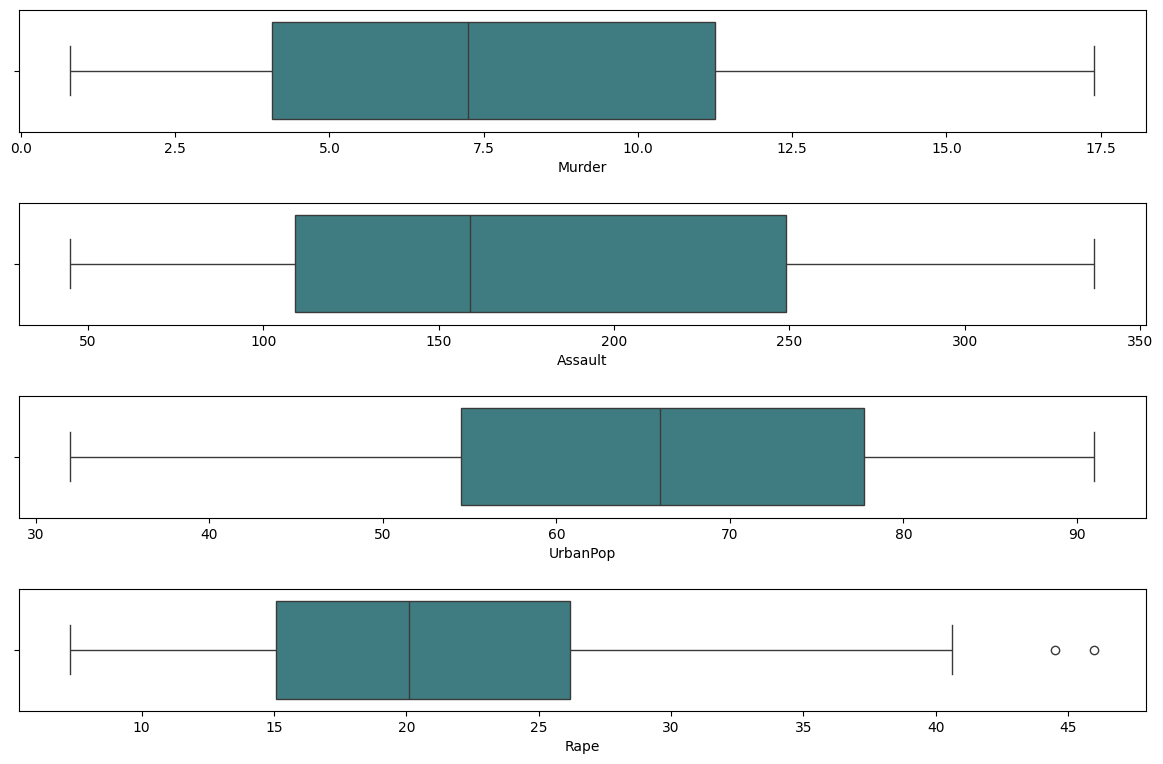

In [13]:
outlier = data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=outlier,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

Correlation Heatmap

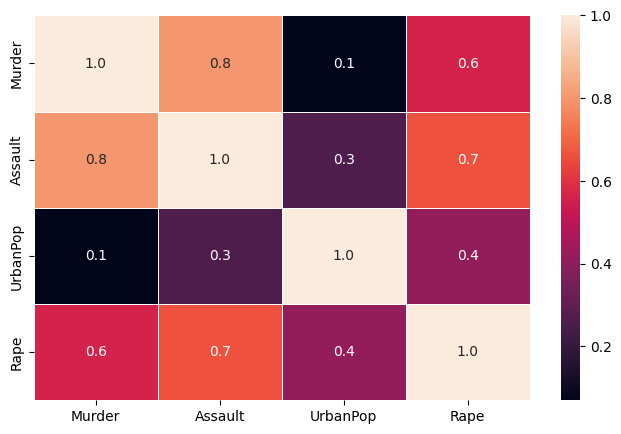

In [16]:
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

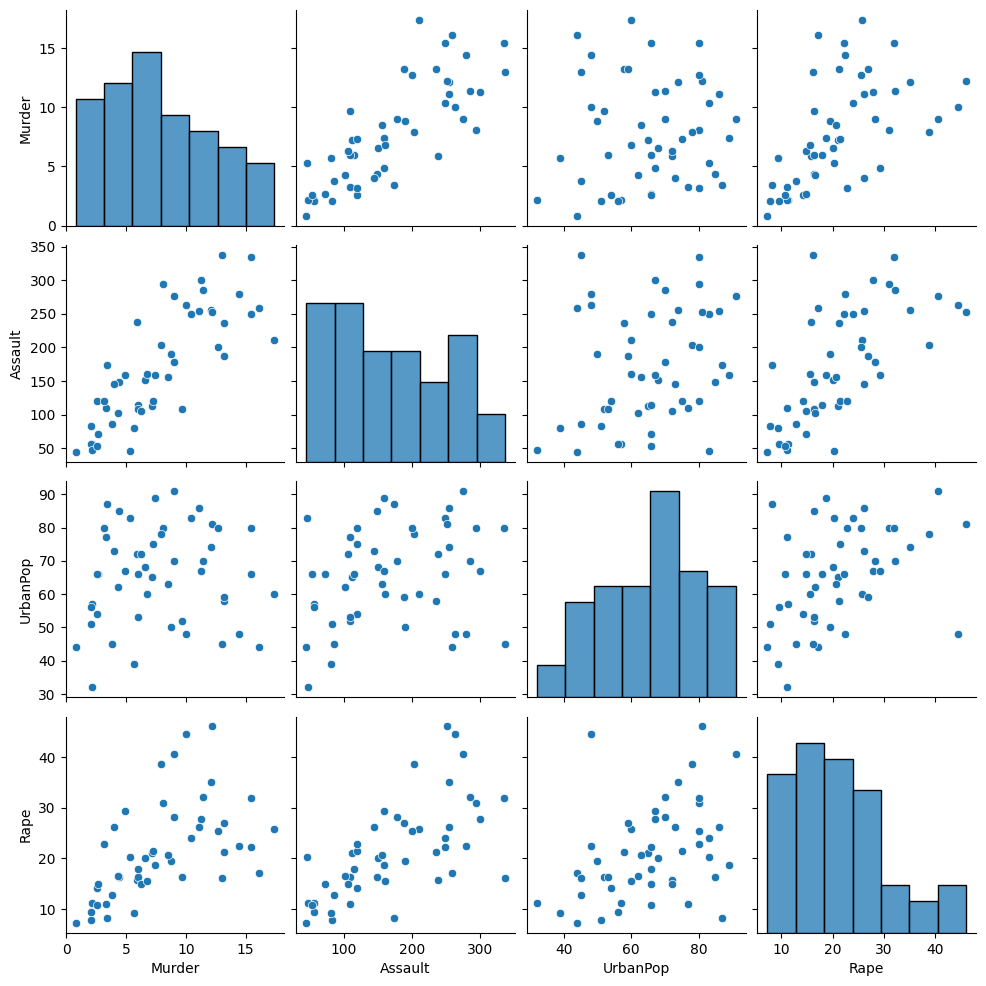

In [17]:
sns.pairplot(data)
plt.show()

# K Mean Clustering

In [41]:
kmeans_data=data

In [42]:
kmeans_data.shape

(50, 4)

# Scale the data - Standardize

In [43]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_scaled_data =scaler.fit_transform(kmeans_data)

In [44]:
kmeans_scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [45]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(kmeans_scaled_data)

KMeans(n_clusters=3, random_state=0)

In [46]:
predict=kmeans.fit_predict(kmeans_scaled_data)

In [47]:
predict

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [48]:
kmeans.inertia_

80.0888613219962

In [51]:
# within-cluster sum-of-squares criterion
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    predict=kmeans.fit_predict(kmeans_scaled_data)
    wcss.append(kmeans.inertia_)

In [52]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

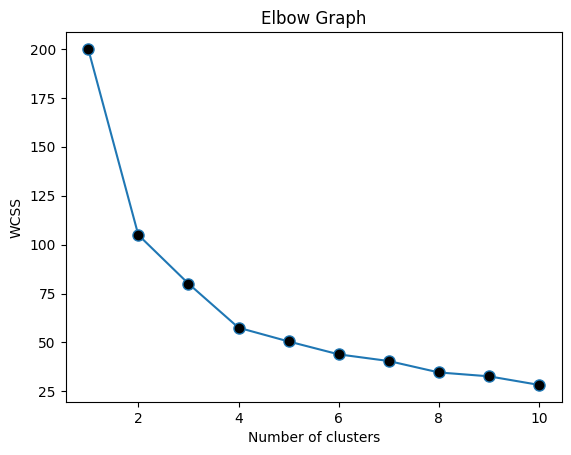

In [53]:
plt.plot(range(1,11),wcss,marker='o',markersize=8,markerfacecolor='black')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# we taking number of cluster as 4
final_model=KMeans(n_clusters=4,random_state=0)
final_model.fit(kmeans_scaled_data)

KMeans(n_clusters=4, random_state=0)

In [55]:
final_model.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [56]:
# creating a new column Label
kmeans_data["kmeans_Label"]=final_model.labels_
kmeans_data

,Murder,Assault,UrbanPop,Rape,kmeans_Label
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [57]:
# grouping by Labels
kmeans_grp=data.groupby('kmeans_Label')

In [58]:
for x,y in kmeans_grp:
  print(y)
  print('_'*60)

    Murder  Assault  UrbanPop  Rape  kmeans_Label
6      3.3      110        77  11.1             0
7      5.9      238        72  15.8             0
10     5.3       46        83  20.2             0
13     7.2      113        65  21.0             0
15     6.0      115        66  18.0             0
20     4.4      149        85  16.3             0
29     7.4      159        89  18.8             0
34     7.3      120        75  21.4             0
35     6.6      151        68  20.0             0
36     4.9      159        67  29.3             0
37     6.3      106        72  14.9             0
38     3.4      174        87   8.3             0
43     3.2      120        80  22.9             0
45     8.5      156        63  20.7             0
46     4.0      145        73  26.2             0
49     6.8      161        60  15.6             0
____________________________________________________________
    Murder  Assault  UrbanPop  Rape  kmeans_Label
1     10.0      263        48  44.5    

In [59]:
kmeans_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
kmeans_Label,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


In [60]:
count_df = kmeans_data.groupby(['kmeans_Label']).count()
count_df

,Murder,Assault,UrbanPop,Rape
kmeans_Label,,,,
0,16,16,16,16
1,13,13,13,13
2,13,13,13,13
3,8,8,8,8


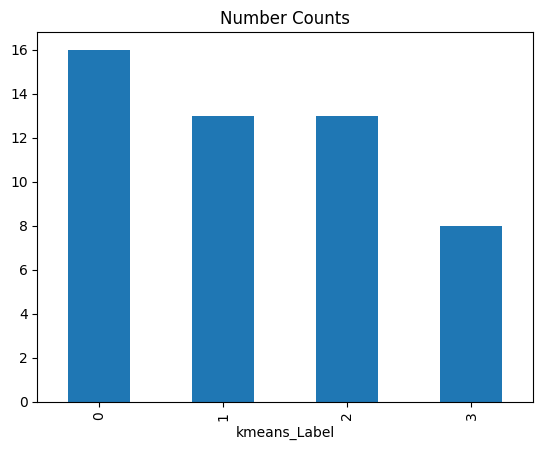

In [61]:
count = count_df.xs('Murder' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

In [63]:
from sklearn.metrics import silhouette_score

In [64]:
silhouette_avg = silhouette_score(kmeans_scaled_data, final_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.33968891433344395


# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [66]:
data=pd.read_csv("crime_data.csv")

In [67]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [68]:
dbscan_data=data
dbscan_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [69]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dbscan_scaled_data =scaler.fit_transform(dbscan_data)

In [70]:
dbscan_scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [71]:
dbscan_model=DBSCAN(min_samples=4,eps=1 )

In [72]:
dbscan_model.fit(dbscan_scaled_data)

DBSCAN(eps=1, min_samples=4)

In [73]:
dbscan_model.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [74]:
dbscan_data["dbscan_Label"]=dbscan_model.labels_
dbscan_data

,Murder,Assault,UrbanPop,Rape,dbscan_Label
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [75]:
# grouping by Labels
dbscan_grp=dbscan_data.groupby('dbscan_Label')

In [95]:
for x,y in dbscan_grp:
  print(y)
  print('_'*60)

    Murder  Assault  UrbanPop  Rape  dbscan_Label
1     10.0      263        48  44.5            -1
2      8.1      294        80  31.0            -1
3      8.8      190        50  19.5            -1
4      9.0      276        91  40.6            -1
5      7.9      204        78  38.7            -1
7      5.9      238        72  15.8            -1
8     15.4      335        80  31.9            -1
9     17.4      211        60  25.8            -1
10     5.3       46        83  20.2            -1
12    10.4      249        83  24.0            -1
19    11.3      300        67  27.8            -1
21    12.1      255        74  35.1            -1
23    16.1      259        44  17.1            -1
27    12.2      252        81  46.0            -1
30    11.4      285        70  32.1            -1
31    11.1      254        86  26.1            -1
32    13.0      337        45  16.1            -1
42    12.7      201        80  25.5            -1
__________________________________________________

In [77]:
dbscan_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
dbscan_Label,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


In [79]:
silhouette_avg = silhouette_score(dbscan_scaled_data, dbscan_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2051154919322


# Hierarchical Clustering

In [78]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy

In [80]:
data=pd.read_csv("crime_data.csv")

In [81]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [82]:
hiera_data=data
hiera_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [83]:
#scailing the data using MinMax scalar
scaler=MinMaxScaler()
hiera_scaled_data=scaler.fit_transform(hiera_data)
hiera_scaled_data

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [84]:
# create clusters
hc_model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [85]:
hc_model.fit(hiera_scaled_data)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [86]:
hc_model.labels_

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0])

In [87]:
hiera_data["hiera_Label"]=hc_model.labels_
hiera_data

,Murder,Assault,UrbanPop,Rape,hiera_Label
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [88]:
# grouping by Labels
hiera_grp=hiera_data.groupby('hiera_Label')

In [89]:
for x,y in hiera_grp:
  print(y)
  print('_'*60)

    Murder  Assault  UrbanPop  Rape  hiera_Label
3      8.8      190        50  19.5            0
6      3.3      110        77  11.1            0
7      5.9      238        72  15.8            0
10     5.3       46        83  20.2            0
11     2.6      120        54  14.2            0
13     7.2      113        65  21.0            0
14     2.2       56        57  11.3            0
15     6.0      115        66  18.0            0
16     9.7      109        52  16.3            0
18     2.1       83        51   7.8            0
20     4.4      149        85  16.3            0
22     2.7       72        66  14.9            0
25     6.0      109        53  16.4            0
26     4.3      102        62  16.5            0
28     2.1       57        56   9.5            0
29     7.4      159        89  18.8            0
33     0.8       45        44   7.3            0
34     7.3      120        75  21.4            0
35     6.6      151        68  20.0            0
36     4.9      159 

In [90]:
hiera_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
hiera_Label,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714


In [91]:
count_df = hiera_data.groupby(['hiera_Label']).count()
count_df

,Murder,Assault,UrbanPop,Rape
hiera_Label,,,,
0,30,30,30,30
1,12,12,12,12
2,1,1,1,1
3,7,7,7,7


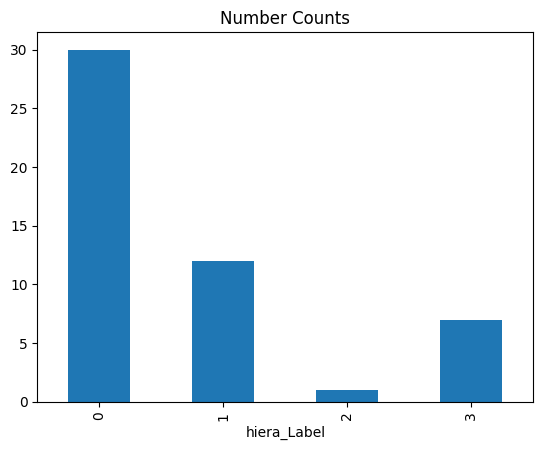

In [92]:
count = count_df.xs('Murder' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

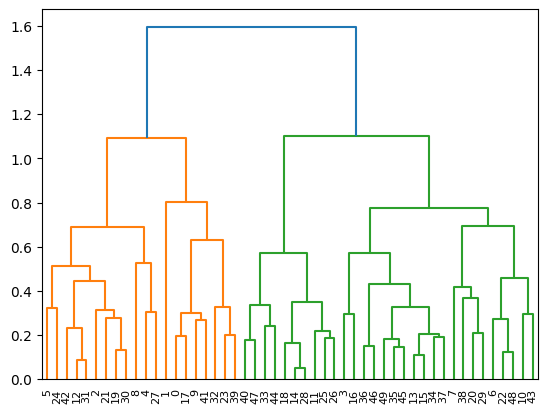

In [93]:
hiera=hierarchy.linkage(hiera_scaled_data,method='complete')
dendrogram=hierarchy.dendrogram(hiera)

In [94]:
silhouette_avg = silhouette_score(hiera_scaled_data, hc_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.36992391140277175


INFERENCES

Kmeans Clustering:-

Silhouette Score: 0.33968891433344395

Hierarchical Clustering:-

Silhouette Score: 0.36992391140277175

DBSCANclustering:-

Silhouette Score: 0.2051154919322